<a href="https://colab.research.google.com/github/GanaRandhi/Encoding_Modalities/blob/main/GS_GenAI_C1_W8_assignment_smart_food_image_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smart Food Image Generator - Assignment

Week 8: Multimodal AI for Food Delivery Business

OBJECTIVE: Build an AI system that can generate professional food images
and analyze them for safety using Stable Diffusion and BLIP models.

LEARNING GOALS:
- Use Stable Diffusion for text-to-image generation
- Use BLIP VQA for food analysis and safety detection
- Combine multiple AI models for practical food delivery applications
- Build a complete food generation and analysis pipeline

### Import the necessary libraries

In [5]:
!pip install torch --upgrade diffusers transformers accelerate safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 107.7 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.4
    Uninstalling tokenizers-0.21.4:
      Successfully uninstalled tokenizers-0.21.4
  Attempting uninstall: transformers
    Found existing installation: transformers 4.55.4
    Uninstalling transformers-4.55.4:
      Successfully uninstalled transformers-4.55.4


In [6]:
!pip install matplotlib

In [7]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
from diffusers import StableDiffusionPipeline
from transformers import BlipProcessor, BlipForQuestionAnswering

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

In [8]:
def setup_device():
    """
    Setup device for optimal performance

    SOLUTION: Check for available hardware and return appropriate device and data type.
    """
    if torch.cuda.is_available():
        return "cuda", torch.float16
    elif torch.backends.mps.is_available():
        return "mps", torch.float32
    else:
        return "cpu", torch.float32

# TEST: Setup device
print("🔧 TESTING: Setting up device...")
device, dtype = setup_device()
print(f"Using device: {device}")
print()

🔧 TESTING: Setting up device...
Using device: cuda



---

### Load Models

In [9]:
def load_models(device, dtype):
    """
    Load all required models for food generation and analysis

    SOLUTION: Load Stable Diffusion and BLIP models
    HINT: Use the model loading patterns from Week8 notebooks
    HINT: Use 'global' keyword to modify global variables

    MODELS TO LOAD:
    - Stable Diffusion: "runwayml/stable-diffusion-v1-5"
    - BLIP VQA: "Salesforce/blip-vqa-base"

    Args:
        device: Device to load models on
        dtype: Data type for models

    Returns:
        None: Models are loaded into global variables
    """
    global text2img_pipe, blip_model, blip_processor

    print("📦 Loading models...")

    # Load Stable Diffusion pipeline
    text2img_pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=dtype)
    text2img_pipe = text2img_pipe.to(device)

    # Load BLIP VQA model and processor
    blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
    blip_model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base", torch_dtype=dtype).to(device)
    blip_model.eval()

    print("✅ All models loaded successfully!")

# TEST: Load models
print("📦 TESTING: Loading models...")
text2img_pipe, blip_model, blip_processor = None, None, None # Initialize global variables before function call
load_models(device, dtype)

📦 TESTING: Loading models...
📦 Loading models...


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

✅ All models loaded successfully!


---

### Generate Food Image

🍽️ TESTING: Generating food image...
🍽️ Generating: Chicken Borscht with red sauce, buckwheat only and Vodka on the side


  0%|          | 0/50 [00:00<?, ?it/s]

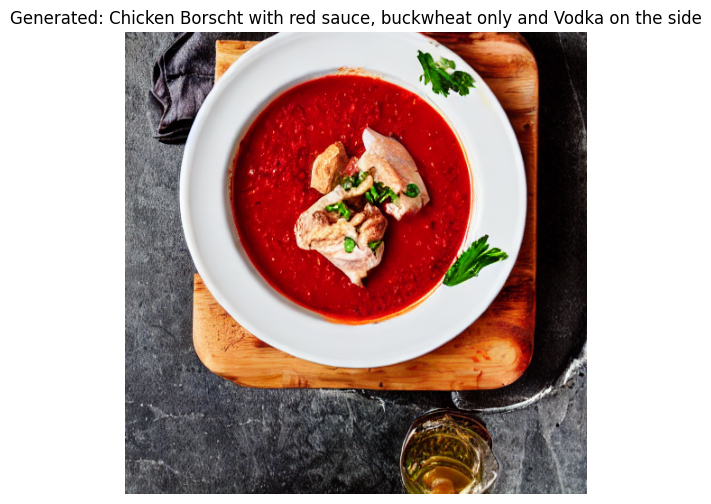

In [27]:
def generate_food_image(food_description, seed=42):
    """
    Generate professional food image from text description

    TODO: Implement food image generation using Stable Diffusion
    HINT: Enhance the prompt with food photography terms
    HINT: Use negative prompts to avoid unappetizing results
    HINT: Set seed for reproducible results

    Args:
        food_description (str): Description of food to generate
        seed (int): Random seed for reproducibility

    Returns:
        PIL.Image: Generated food image

    EXAMPLE INPUT: "butter chicken with rice and naan"
    EXAMPLE OUTPUT: PIL Image of appetizing butter chicken dish
    """
    print(f"🍽️ Generating: {food_description}")

    # TODO: Enhance prompt for better food photography
    prompt = f"{food_description}, professional food photography, appetizing, restaurant style"

    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)

    # TODO: Generate image using Stable Diffusion
    with torch.no_grad():
        result = text2img_pipe(prompt=prompt, num_inference_steps=50, guidance_scale=7.5)

    # TODO: Return the generated image
    return result.images[0]

    # DUMMY IMPLEMENTATION (Remove this when implementing)
    print("⚠️ DUMMY: Would generate food image here")
    # Create a dummy image for testing
    dummy_image = Image.new('RGB', (512, 512), color='lightblue')
    return dummy_image

# TEST: Generate food image
print("🍽️ TESTING: Generating food image...")
test_food = "Chicken Borscht with red sauce, buckwheat only and Vodka on the side"
food_image = generate_food_image(test_food, 555)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(food_image)
plt.title(f"Generated: {test_food}")
plt.axis('off')
plt.show()
print()

---

### Question Answering about Food

In [28]:
def ask_about_food(image, question):
    """
    Ask questions about food using BLIP VQA

    TODO: Implement visual question answering using BLIP
    HINT: Process image and question, then generate answer
    HINT: Use the global blip_model and blip_processor

    Args:
        image (PIL.Image): Food image to analyze
        question (str): Question to ask about the food

    Returns:
        str: Answer to the question

    EXAMPLE INPUT:
        image = <PIL Image of curry>
        question = "Does this contain dairy?"

    EXAMPLE OUTPUT: "yes"
    """

    # Solution: Process image and question using BLIP
    inputs = blip_processor(image, question, return_tensors="pt")

    # Move inputs to the same device as the model
    inputs = {name: tensor.to(blip_model.device) for name, tensor in inputs.items()}

    # Solution: Generate answer
    with torch.no_grad():
        out = blip_model.generate(**inputs)

    # Solution: Decode and return answer
    answer = blip_processor.decode(out[0], skip_special_tokens=True)
    return answer.strip()

    # DUMMY IMPLEMENTATION (Remove this when implementing)
    print(f"⚠️ DUMMY: Would answer '{question}' about the food")
    return "unknown"

# TEST: Ask questions about food
print("❓ TESTING: Asking questions about food...")
questions = [
    "What type of food is this?",
    "Does this contain dairy?",
    "Does it come with Alcohol as side?",
    "Does it have bread?",
    "Does this contain nuts?",
    "Does it contain meat?"
]

for question in questions:
    answer = ask_about_food(food_image, question)
    print(f"Q: {question}")
    print(f"A: {answer}")
    print()

❓ TESTING: Asking questions about food...
Q: What type of food is this?
A: soup

Q: Does this contain dairy?
A: no

Q: Does it come with Alcohol as side?
A: yes

Q: Does it have bread?
A: no

Q: Does this contain nuts?
A: no

Q: Does it contain meat?
A: yes



---

### Analyze Food Safety

In [29]:
def analyze_food_safety(food_image):
    """
    Analyze food for ingredients and allergens

    TODO: Implement comprehensive food safety analysis
    HINT: Ask specific questions about allergens and dietary info
    HINT: Check for common allergens: dairy, nuts, eggs, gluten

    Args:
        food_image (PIL.Image): Food image to analyze

    Returns:
        dict: Analysis results with description, allergens, and dietary info

    EXAMPLE OUTPUT: {
        "description": "butter chicken with rice",
        "allergens": ["dairy", "gluten"],
        "vegetarian": "no",
        "spicy": "yes"
    }
    """
    print("🔬 Analyzing food safety...")

    # Get basic info
    description = ask_about_food(food_image, "What type of food is this?")
    # Check for common allergens
    allergen_questions = [
        "Does this contain dairy or milk?",
        "Does this contain nuts?",
    ]

    allergens = []
    for question in allergen_questions:
        answer = ask_about_food(food_image, question)
        if "yes" in answer.lower():
            print("yes")
            allergen = question.split("contain ")[-1].split("?")[0]
            allergens.append(allergen)

    # solution: Get dietary information
    vegetarian = ask_about_food(food_image, "Does the food considered as vegetarian?")
    spicy = ask_about_food(food_image, "How Spicy is the above food?")

    for a in allergens:
        print(a)
    # solution: Compile analysis results
    analysis = {
        "description": description,
        "allergens": allergens,
        "vegetarian": vegetarian,
        "spicy": spicy
    }

    # DUMMY IMPLEMENTATION (Remove this when implementing)
    # analysis = {
    #     "description": "unknown food",
    #     "allergens": [],
    #     "vegetarian": "unknown",
    #     "spicy": "unknown"
    # }
    #print("⚠️ DUMMY: Returning fake analysis results")

    print("✅ Food analysis complete!")
    return analysis

# TEST: Analyze food safety
print("🔬 TESTING: Food safety analysis...")
analysis = analyze_food_safety(food_image)

print("Analysis Results:")
print(f"Description: {analysis['description']}")
print(f"Allergens: {', '.join(analysis['allergens']) if analysis['allergens'] else 'None detected'}")
print(f"Vegetarian: {analysis['vegetarian']}")
print(f"Spicy: {analysis['spicy']}")

🔬 TESTING: Food safety analysis...
🔬 Analyzing food safety...
✅ Food analysis complete!
Analysis Results:
Description: soup
Allergens: None detected
Vegetarian: no
Spicy: very


---

### Generate and Analyze Food

🚀 TESTING: Complete pipeline...

--- Testing: chocolate chip cookies ---
🚀 Complete pipeline for: chocolate chip cookies
🍽️ Generating: chocolate chip cookies


  0%|          | 0/50 [00:00<?, ?it/s]

🔬 Analyzing food safety...
✅ Food analysis complete!


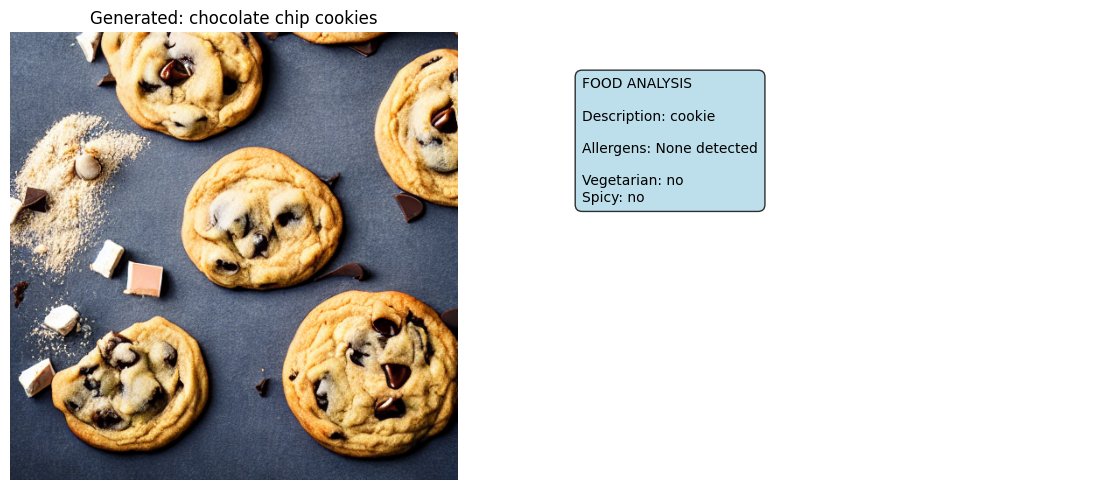



--- Testing: grilled salmon with vegetables ---
🚀 Complete pipeline for: grilled salmon with vegetables
🍽️ Generating: grilled salmon with vegetables


  0%|          | 0/50 [00:00<?, ?it/s]

🔬 Analyzing food safety...
✅ Food analysis complete!


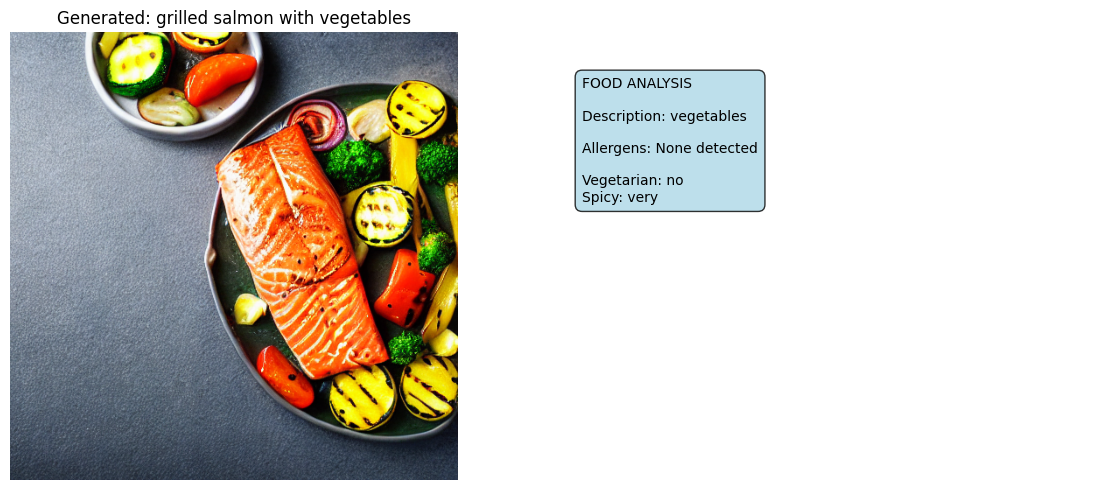



--- Testing: Chicken Borscht with red sauce, buckwheat only and Vodka on the side ---
🚀 Complete pipeline for: Chicken Borscht with red sauce, buckwheat only and Vodka on the side
🍽️ Generating: Chicken Borscht with red sauce, buckwheat only and Vodka on the side


  0%|          | 0/50 [00:00<?, ?it/s]

🔬 Analyzing food safety...
✅ Food analysis complete!


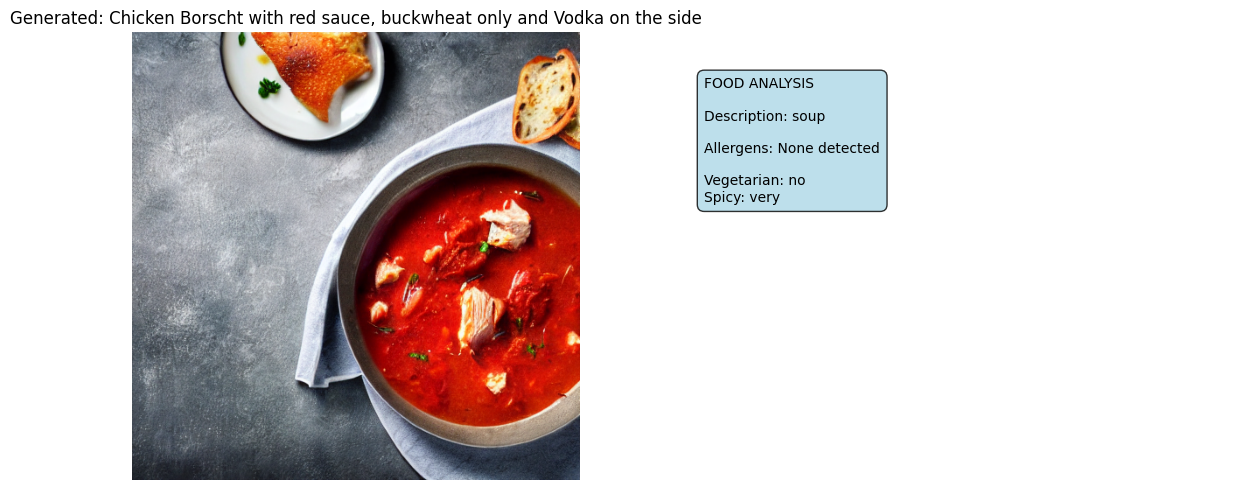

In [32]:
def generate_and_analyze_food(food_description):
    """
    Complete pipeline: generate food image and analyze it

    TODO: Implement the complete food generation and analysis pipeline
    HINT: Combine image generation with safety analysis
    HINT: Display results in a side-by-side format

    Args:
        food_description (str): Description of food to generate and analyze

    Returns:
        tuple: (generated_image, analysis_results)

    PIPELINE STEPS:
    1. Generate food image using generate_food_image()
    2. Analyze the food using analyze_food_safety()
    3. Display results with image and analysis side-by-side
    4. Return both image and analysis
    """
    print(f"🚀 Complete pipeline for: {food_description}")

    # TODO: Step 1 - Generate food image
    food_image = generate_food_image(food_description, 666)

    # TODO: Step 2 - Analyze the food
    analysis = analyze_food_safety(food_image)

    # TODO: Step 3 - Display results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

     # Show image
    ax1.imshow(food_image)
    ax1.set_title(f"Generated: {food_description}")
    ax1.axis('off')
     # Show analysis
    ax2.axis('off')
    analysis_text = f"FOOD ANALYSIS\n\n"
    analysis_text += f"Description: {analysis['description']}\n\n"
    analysis_text += f"Allergens: {', '.join(analysis['allergens']) if analysis['allergens'] else 'None detected'}\n\n"
    analysis_text += f"Vegetarian: {analysis['vegetarian']}\n"
    analysis_text += f"Spicy: {analysis['spicy']}"
    ax2.text(0.1, 0.9, analysis_text, transform=ax2.transAxes,
              fontsize=10, verticalalignment='top',
              bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
    plt.tight_layout()
    plt.show()
    # TODO: Step 4 - Return results
    return food_image, analysis

    # DUMMY IMPLEMENTATION (Remove this when implementing)
    # print("⚠️ DUMMY: Would run complete pipeline here")
    # dummy_image = Image.new('RGB', (512, 512), color='lightgreen')
    # dummy_analysis = {"description": "test food", "allergens": [], "vegetarian": "unknown", "spicy": "unknown"}

    # Simple display for dummy
    plt.figure(figsize=(6, 4))
    plt.imshow(dummy_image)
    plt.title(f"DUMMY: {food_description}")
    plt.axis('off')
    plt.show()

    return dummy_image, dummy_analysis

# TEST: Complete pipeline
print("🚀 TESTING: Complete pipeline...")
test_foods = [
    "chocolate chip cookies",
    "grilled salmon with vegetables",
    "Chicken Borscht with red sauce, buckwheat only and Vodka on the side"
]

for food in test_foods:
    print(f"\n--- Testing: {food} ---")
    img, result = generate_and_analyze_food(food)
    print()

---